# Multiple Linear Regression for Car Price Forecasting

This notebook focuses on predicting car prices using Multiple Linear Regression, a cornerstone technique in machine learning for understanding and forecasting outcomes influenced by multiple factors. My objective is to model the intricate relationships between car prices and their determining features, such as make, model, fueltype, and enginesize, among others. I aim to showcase the application of MLR through two distinct methodologies, enabling a comprehensive understanding of both the theory and practical implementation of this regression technique.

##### Section 1: Predicting Car Prices with Scikit-learn

In the first section, I employ Scikit-learn, a widely acclaimed Python library for machine learning, to construct and evaluate my Multiple Linear Regression model. Scikit-learn simplifies the process of data preprocessing, model training, and evaluation, allowing us to focus on achieving the best model performance with minimal coding effort. This section serves as a demonstration of how machine learning can be applied efficiently in predictive modeling, leveraging the robust functionalities offered by Scikit-learn for a streamlined development process.

##### Section 2: Building a Multiple Linear Regression Model from Scratch

The second section takes a more fundamental approach by developing the Multiple Linear Regression model without the aid of Scikit-learn or similar libraries. This hands-on method involves coding the algorithm's essential components, such as computing the regression coefficients and predicting outcomes based on the input variables. The aim is to deepen my understanding of the MLR algorithm's mechanics and appreciate the intricacies of manual model building. This section highlights the challenges and rewards of implementing machine learning algorithms from the ground up, providing valuable insights into the mathematical and computational aspects of predictive modeling.

Through both sections, I'll explore the nuances of machine learning model development, from high-level library utilization to the foundational building blocks of algorithms, all within the context of car price prediction.

## Importing the Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

## Importing the Data

In [42]:
car_price = pd.read_csv("CarPrice.csv")
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [43]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Preprocessing

### Removing/Adding extra columns

In [44]:
Company = car_price["CarName"].apply(lambda x:x.split()[0].lower()).to_list()
Company

['alfa-romero',
 'alfa-romero',
 'alfa-romero',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'chevrolet',
 'chevrolet',
 'chevrolet',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'isuzu',
 'isuzu',
 'isuzu',
 'isuzu',
 'jaguar',
 'jaguar',
 'jaguar',
 'maxda',
 'maxda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'mercury',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'nissan',
 'nissan',
 'nissan',


In [45]:
car_price.drop(columns=["CarName","car_ID","symboling"], inplace=True)

In [46]:
car_price.insert(loc=0,column="Company",value=Company)

In [47]:
car_price.columns

Index(['Company', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

### Correcting Spellings

In [48]:
len(pd.DataFrame(car_price["Company"].unique()))

27

In [49]:
print(pd.DataFrame(car_price["Company"].unique(), columns=["Company"]))

        Company
0   alfa-romero
1          audi
2           bmw
3     chevrolet
4         dodge
5         honda
6         isuzu
7        jaguar
8         maxda
9         mazda
10        buick
11      mercury
12   mitsubishi
13       nissan
14      peugeot
15     plymouth
16      porsche
17     porcshce
18      renault
19         saab
20       subaru
21       toyota
22      toyouta
23    vokswagen
24   volkswagen
25           vw
26        volvo


In [50]:
### Correction spellings of Company
car_price["Company"].replace("alfa-romero", "alfa-romeo", inplace=True)
car_price["Company"].replace("maxda", "mazda", inplace=True)
car_price["Company"].replace("porcshce", "porsche", inplace=True)
car_price["Company"].replace("toyouta", "toyota", inplace=True)
car_price["Company"].replace("vokswagen", "volkswagen", inplace=True)
car_price["Company"].replace("vw", "volkswagen", inplace=True)

### Data Exploration

In [51]:
car_price.head()

,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Categorical Data

In [52]:
categorical = car_price.select_dtypes(include='object').columns.tolist()
categorical

['Company',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [53]:
for col in categorical:
    print(col.upper()+":")
    print(car_price[col].value_counts())
    print("Total:",car_price[col].nunique(),"\n")

COMPANY:
toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
volkswagen    12
subaru        12
peugeot       11
volvo         11
dodge          9
buick          8
bmw            8
audi           7
plymouth       7
saab           6
porsche        5
isuzu          4
jaguar         3
chevrolet      3
alfa-romeo     3
renault        2
mercury        1
Name: Company, dtype: int64
Total: 22 

FUELTYPE:
gas       185
diesel     20
Name: fueltype, dtype: int64
Total: 2 

ASPIRATION:
std      168
turbo     37
Name: aspiration, dtype: int64
Total: 2 

DOORNUMBER:
four    115
two      90
Name: doornumber, dtype: int64
Total: 2 

CARBODY:
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
Total: 5 

DRIVEWHEEL:
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
Total: 3 

ENGINELOCATION:
front    202
rear       3
Name: enginelocation, dtype: int64
Total: 2 

ENGINETYPE:
ohc      148
ohc

In [54]:
car_melted = car_price.melt(id_vars=["Company"], value_vars=categorical,var_name="category",value_name="value")
car_melted.head()

,Company,category,value
0,alfa-romeo,fueltype,gas
1,alfa-romeo,fueltype,gas
2,alfa-romeo,fueltype,gas
3,audi,fueltype,gas
4,audi,fueltype,gas


In [55]:
car_pivot = car_melted.pivot_table(index="Company",columns=["category","value"],aggfunc="size",fill_value=0)
car_pivot.head()

category   aspiration           carbody                                \
value             std turbo convertible hardtop hatchback sedan wagon   
Company                                                                 
alfa-romeo          3     0           2       0         1     0     0   
audi                5     2           0       0         1     5     1   
bmw                 8     0           0       0         0     8     0   
buick               4     4           1       2         0     4     1   
chevrolet           3     0           0       0         2     1     0   

category   cylindernumber                                doornumber      \
value               eight five four six three twelve two       four two   
Company                                                                   
alfa-romeo              0    0    2   1     0      0   0          0   3   
audi                    0    6    1   0     0      0   0          5   2   
bmw                     0    0    2   6     0      0   0          5   3   
buick                   4    4    0   0     0      0   0          5   3   
chevrolet               0    0    2   0     1      0   0          1   2   

category   drivewheel         enginelocation      enginetype               \
value             4wd fwd rwd          front rear       dohc dohcv  l ohc   
Company                                                                     
alfa-romeo          0   0   3              3    0          2     0  0   0   
audi                2   5   0              7    0          0     0  0   7   
bmw                 0   0   8              8    0          0     0  0   8   
buick               0   0   8              8    0          0     0  0   4   
chevrolet           0   3   0              3    0          0     0  1   2   

category                   fuelsystem                                   \
value      ohcf ohcv rotor       1bbl 2bbl 4bbl idi mfi mpfi spdi spfi   
Company                                                                  
alfa-romeo    0    1     0          0    0    0   0   0    3    0    0   
audi          0    0     0          0    0    0   0   0    7    0    0   
bmw           0    0     0          0    0    0   0   0    8    0    0   
buick         0    4     0          0    0    0   4   0    4    0    0   
chevrolet     0    0     0          0    3    0   0   0    0    0    0   

category   fueltype      
value        diesel gas  
Company                  
alfa-romeo        0   3  
audi              0   7  
bmw               0   8  
buick             4   4  
chevrolet         0   3

In [56]:
car_pivot

category   aspiration           carbody                                \
value             std turbo convertible hardtop hatchback sedan wagon   
Company                                                                 
alfa-romeo          3     0           2       0         1     0     0   
audi                5     2           0       0         1     5     1   
bmw                 8     0           0       0         0     8     0   
buick               4     4           1       2         0     4     1   
chevrolet           3     0           0       0         2     1     0   
dodge               6     3           0       0         5     3     1   
honda              13     0           0       0         7     5     1   
isuzu               4     0           0       0         1     3     0   
jaguar              3     0           0       0         0     3     0   
mazda              17     0           0       0        10     7     0   
mercury             0     1           0       0         1     0     0   
mitsubishi          7     6           0       0         9     4     0   
nissan             17     1           0       1         5     9     3   
peugeot             5     6           0       0         0     7     4   
plymouth            5     2           0       0         4     2     1   
porsche             5     0           1       2         2     0     0   
renault             2     0           0       0         1     0     1   
saab                4     2           0       0         3     3     0   
subaru             10     2           0       0         3     5     4   
toyota             31     1           1       3        14    10     4   
volkswagen         10     2           1       0         1     9     1   
volvo               6     5           0       0         0     8     3   

category   cylindernumber                                doornumber      \
value               eight five four six three twelve two       four two   
Company                                                                   
alfa-romeo              0    0    2   1     0      0   0          0   3   
audi                    0    6    1   0     0      0   0          5   2   
bmw                     0    0    2   6     0      0   0          5   3   
buick                   4    4    0   0     0      0   0          5   3   
chevrolet               0    0    2   0     1      0   0          1   2   
dodge                   0    0    9   0     0      0   0          4   5   
honda                   0    0   13   0     0      0   0          5   8   
isuzu                   0    0    4   0     0      0   0          2   2   
jaguar                  0    0    0   2     0      1   0          2   1   
mazda                   0    0   13   0     0      0   4          8   9   
mercury                 0    0    1   0     0      0   0          0   1   
mitsubishi              0    0   13   0     0      0   0          4   9   
nissan                  0    0   12   6     0      0   0          9   9   
peugeot                 0    0   11   0     0      0   0         11   0   
plymouth                0    0    7   0     0      0   0          4   3   
porsche                 1    0    1   3     0      0   0          0   5   
renault                 0    0    2   0     0      0   0          1   1   
saab                    0    0    6   0     0      0   0          3   3   
subaru                  0    0   12   0     0      0   0          9   3   
toyota                  0    0   28   4     0      0   0         18  14   
volkswagen              0    1   11   0     0      0   0          8   4   
volvo                   0    0    9   2     0      0   0         11   0   

category   drivewheel         enginelocation      enginetype                \
value             4wd fwd rwd          front rear       dohc dohcv   l ohc   
Company                                                                      
alfa-romeo          0   0   3              3    0          2    

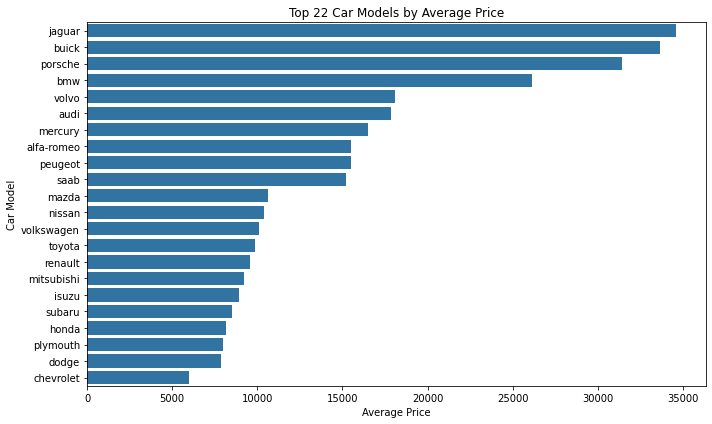

In [57]:
# Calculate average price for each car model
avg_prices_by_car = car_price.groupby('Company')['price'].mean().sort_values(ascending=False)

n = car_price["Company"].nunique()
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

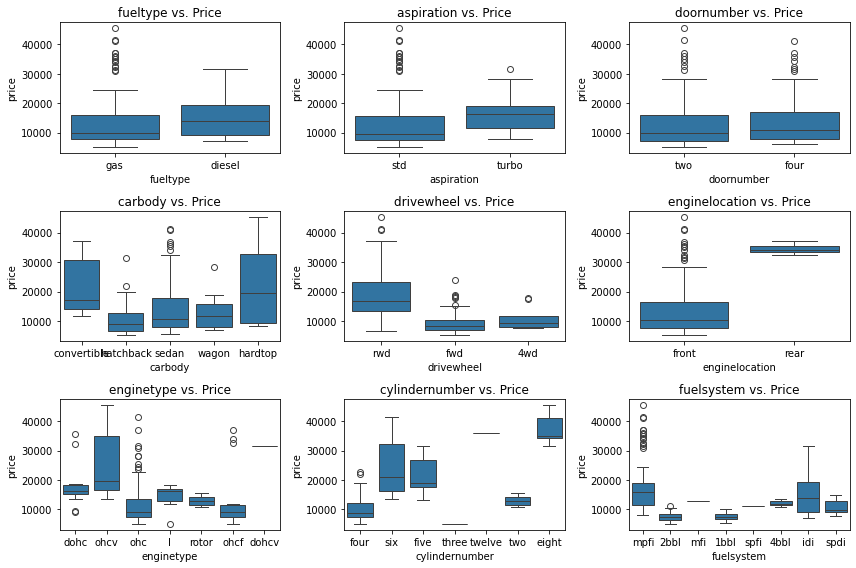

In [58]:
plt.figure(figsize=(12, 8))
categorical_features = categorical.copy()
categorical_features.remove("Company")
for feature in categorical_features:
    plt.subplot(3, 3, categorical_features.index(feature) + 1)
    sns.boxplot(data=car_price, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

#### Numeric Data

In [59]:
car_price.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [60]:
numerical = car_price.select_dtypes(exclude='object').columns.tolist()
numerical.pop()
numerical

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

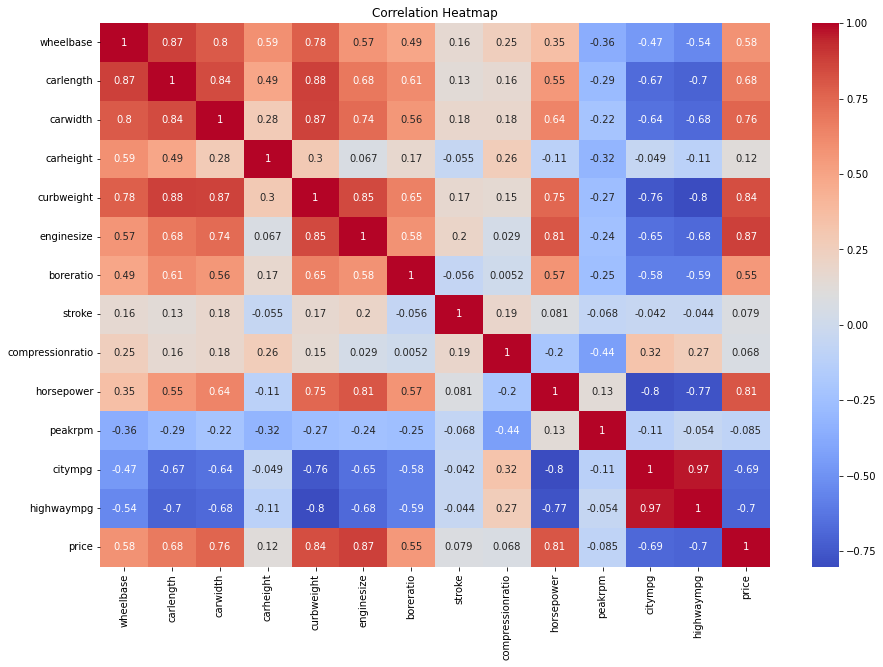

In [61]:
# Correlation Analysis
numerical_feat = numerical.copy()
numerical_feat.append("price")
correlation_matrix = car_price[numerical_feat].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

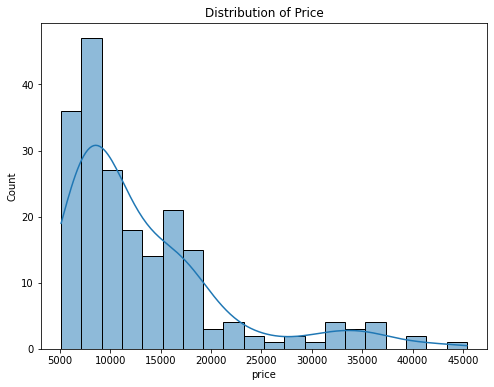

In [62]:
# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(car_price['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

In [63]:
categorical, numerical

(['Company',
  'fueltype',
  'aspiration',
  'doornumber',
  'carbody',
  'drivewheel',
  'enginelocation',
  'enginetype',
  'cylindernumber',
  'fuelsystem'],
 ['wheelbase',
  'carlength',
  'carwidth',
  'carheight',
  'curbweight',
  'enginesize',
  'boreratio',
  'stroke',
  'compressionratio',
  'horsepower',
  'peakrpm',
  'citympg',
  'highwaympg'])

In [64]:
## Removing Unwanted features
car_price.drop(columns=["doornumber", "fuelsystem", "drivewheel", "enginelocation", "carheight", "stroke", "compressionratio", "peakrpm"], inplace=True)

categorical.remove("doornumber")
categorical.remove("fuelsystem")
categorical.remove("drivewheel")
categorical.remove("enginelocation")
numerical.remove("carheight")
numerical.remove("stroke")
numerical.remove("compressionratio")
numerical.remove("peakrpm")

### Train Test Splitting

In [65]:
X = car_price.drop("price", axis=1)
Y = car_price["price"]

In [66]:
len(X),len(Y)

(205, 205)

In [67]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [68]:
x_train.shape,y_train.shape

((143, 15), (143,))

### Data Encoding

In [69]:
numerical,categorical

(['wheelbase',
  'carlength',
  'carwidth',
  'curbweight',
  'enginesize',
  'boreratio',
  'horsepower',
  'citympg',
  'highwaympg'],
 ['Company',
  'fueltype',
  'aspiration',
  'carbody',
  'enginetype',
  'cylindernumber'])

In [70]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical),
        ('cat', categorical_transformer, categorical)
])

In [71]:
# Apply transformations
X_train = preprocessor.fit_transform(x_train)
X_test = preprocessor.transform(x_test)

In [72]:
Y_train = y_train.values
Y_test = y_test.values

In [73]:
Y_train.shape,X_train.shape

((143,), (143, 53))

In [74]:
Y_test.shape,X_test.shape

((62,), (62, 53))

## Section - 1

### Using scikit-learn

In [75]:
mr = LinearRegression()
mr.fit(X_train,Y_train)

LinearRegression()

In [76]:
Y_pred = mr.predict(X_test)
Y_pred

array([10262.22830332,  9865.74122053,  4712.46806037, 19595.14801936,
       12549.61365154, 18058.24462623, 23464.96776977,  6887.64618498,
       13240.26282807, 11047.03858559,  5457.71649293,  5880.47122901,
        5896.76821689, 13410.76291745,  6671.58177755,  6697.33807643,
        5438.16321175, 14982.19579327,  6192.4344174 , 12308.77430982,
        8581.7510569 ,  8431.08146538, 12309.92789358, 35339.95069629,
       12144.03462787, 16929.18250465,  8909.79804263, 13582.23132673,
       10506.35151561,  8768.4492012 , 11434.86467908, 16332.51448565,
        7853.92651173,  8236.74253725, 37735.62634518, 10597.78613795,
       22395.36102891, 10109.54305914, 14258.38326759,  7224.96318707,
        5694.17364084, 14024.01092573, 10698.06779809, 34028.03808564,
        9204.56339935,  7983.73155796,  8676.50737253,  6174.65407523,
        6488.01628603,  7275.17402784,  6285.71334889, 24639.32305721,
        5268.39731769,  9628.75200949, 14277.1531972 ,  8660.30889767,
      

### Evaluation

In [77]:
np.concatenate((Y_test.reshape(-1,1),Y_pred.reshape(-1,1)),axis=1)

array([[ 9279.        , 10262.22830332],
       [ 9960.        ,  9865.74122053],
       [ 6377.        ,  4712.46806037],
       [16925.        , 19595.14801936],
       [ 8778.        , 12549.61365154],
       [16500.        , 18058.24462623],
       [22018.        , 23464.96776977],
       [ 7499.        ,  6887.64618498],
       [18344.        , 13240.26282807],
       [10795.        , 11047.03858559],
       [ 6669.        ,  5457.71649293],
       [ 8249.        ,  5880.47122901],
       [ 7053.        ,  5896.76821689],
       [18280.        , 13410.76291745],
       [ 7799.        ,  6671.58177755],
       [ 9258.        ,  6697.33807643],
       [ 6229.        ,  5438.16321175],
       [13499.        , 14982.19579327],
       [ 7198.        ,  6192.4344174 ],
       [11048.        , 12308.77430982],
       [ 7975.        ,  8581.7510569 ],
       [ 7126.        ,  8431.08146538],
       [11259.        , 12309.92789358],
       [45400.        , 35339.95069629],
       [13295.  

In [78]:
# model evaluation test data
print('mean_squared_error : ', mean_squared_error(Y_test, Y_pred)) 
print('R2_score : ', r2_score(Y_test, Y_pred))

mean_squared_error :  6937601.980399819
R2_score :  0.8731667175108968


In [79]:
# model evaluation train data
print('mean_squared_error : ', mean_squared_error(Y_train, mr.predict(X_train))) 
print('R2_score : ', r2_score(Y_train, mr.predict(X_train)))

mean_squared_error :  1840637.2991616493
R2_score :  0.972455776988032


In [81]:
print("Slope =",mr.coef_)
print("Intercept =",mr.intercept_)

Slope = [   286.25944541  -1034.93686877   1335.22918537   4375.8494964
    641.79924502   -960.18888002   2793.39555212    715.23915942
    388.40682146   2685.41501839   1859.80091869   9188.91355895
   4954.9010439   -1930.25083349  -2320.56782493  -1660.66122513
   -271.60535514   5199.49871198   -593.38161188  -3370.20161473
  -2987.69400116   -397.8339731    -151.97905529  -2490.33371899
   6807.96602986  -2074.49018917    976.86382517  -9273.8202602
  -1714.2351617   -1748.03439617   -688.26988585   -104.16003255
    104.16003255   -162.61878772    162.61878772   2023.29608449
  -1333.40660735   -407.59237929    238.0993493    -520.39644715
    721.37868977 -13726.37563359   -151.97905529   2253.9946219
  11260.52140324  -2195.05773649   1837.51771046   5716.16005064
  -1964.85895442   -969.88788494  -1474.27422818  -3144.65669356
   1837.51771046]
Intercept = 13011.694975495671
